In [1]:
from keras.datasets import cifar10
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Activation, Flatten
import matplotlib.pyplot as plt
from PIL import Image

import os
os.environ['KMP_DUPLICATE_LIB_OK']='TRUE'

Using TensorFlow backend.


In [2]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

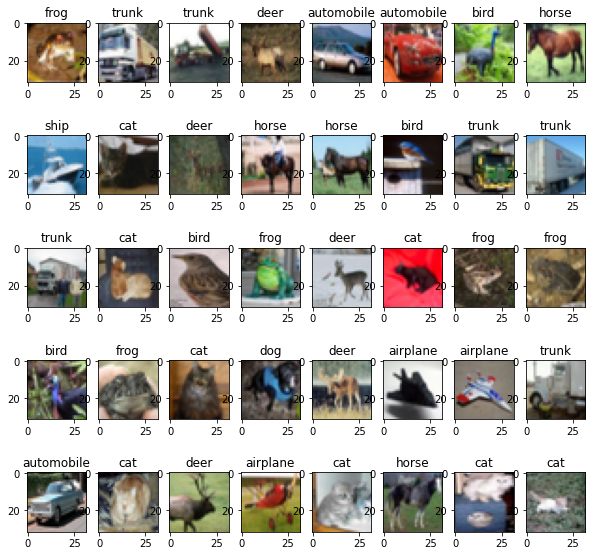

In [3]:
plt.figure(figsize=(10, 10))
labels = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "trunk"]
for i in range(0, 40):
    im = Image.fromarray(X_train[i])
    plt.subplot(5, 8, i + 1)
    plt.title(labels[y_train[i][0]])
    plt.tick_params(labelbottom="off", bottom="off")   # x軸をオフ
    plt.tick_params(labelleft="off", left="off")   # y軸をオフ
    plt.imshow(im)
    
plt.show()

In [4]:
# num_classes = 10
# im_rows = 32
# im_cols = 32
# im_size = im_rows * im_cols * 3

# # データ読み込み
# (X_train, y_train), (X_test, y_test) = cifar10.load_data()

# # データを一次元配列に変換
# X_train = X_train.reshape(-1, im_size).astype("float32") / 255
# X_test = X_test.reshape(-1, im_size).astype("float32") / 255

# # ラベルデータをOne-Hot形式に変換
# y_train = keras.utils.to_categorical(y_train, num_classes)
# y_test = keras.utils.to_categorical(y_test, num_classes)

# # モデルを定義
# model = Sequential()
# model.add(Dense(512, activation="relu", input_shape=(im_size,)))
# model.add(Dense(num_classes, activation="softmax"))

# # モデルを構築
# model.compile(loss="categorical_crossentropy",
#              optimizer="adam",
#              metrics=["accuracy"]
#              )

# # 学習を実行
# hist = model.fit(X_train, y_train, batch_size=32, epochs=50, verbose=1, validation_data=(X_test, y_test))

# # モデルを評価
# score = model.evaluate(X_test, y_test, verbose=1)
# print(f"正解率={score[1]}, loss={score[0]}")

# # 正解率の推移をプロット
# plt.plot(hist.history["accuracy"])
# plt.plot(hist.history["val_accuracy"])
# plt.title("Accuracy")
# plt.legend(["train", "test"], loc="upper left")
# plt.show()

# # ロスの推移をプロット
# plt.plot(hist.history["loss"])
# plt.plot(hist.history["val_loss"])
# plt.title("Loss")
# plt.legend(["train", "test"], loc="upper left")
# plt.show()

# アップデート

In [5]:
num_classes = 10
im_rows = 32
im_cols = 32
in_shape = (im_rows, im_cols, 3)

# データ読み込み
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# データを正規化
X_train = X_train.astype("float32") / 255
X_test = X_test.astype("float32") / 255

# ラベルデータをOne-Hot形式に変換
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# モデルを定義
model = Sequential()
model.add(Conv2D(32, (3, 3), padding="same", input_shape=in_shape))
model.add(Activation("relu"))
model.add(Conv2D(32, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(Conv2D(64, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation("softmax"))




# モデルを構築
model.compile(loss="categorical_crossentropy",
             optimizer="adam",
             metrics=["accuracy"]
             )

# 学習を実行
hist = model.fit(X_train, y_train, batch_size=32, epochs=50, verbose=1, validation_data=(X_test, y_test))

# モデルを評価
score = model.evaluate(X_test, y_test, verbose=1)
print(f"正解率={score[1]}, loss={score[0]}")

# 正解率の推移をプロット
plt.plot(hist.history["accuracy"])
plt.plot(hist.history["val_accuracy"])
plt.title("Accuracy")
plt.legend(["train", "test"], loc="upper left")
plt.show()

# ロスの推移をプロット
plt.plot(hist.history["loss"])
plt.plot(hist.history["val_loss"])
plt.title("Loss")
plt.legend(["train", "test"], loc="upper left")
plt.show()

# モデルの保存

In [6]:
model.save_weights("cifar10-weight.h5")

# 予測

In [7]:
import cv2
import numpy as np

labels = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "trunk"]

im_size = 32 * 32 * 3

# モデルのデータ読み込み
model.load_weight("cifar10-weight.h5")

# OpenCVを使用して画像を読み込む
im = cv2.imread("test-car.jpg")

# 色空間を変換して、リサイズ
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
im = cv2.cvtColor(im, (32, 32))
plt.imshow(im)
plt.show()

# MLPで学習した画像データに合わせる
im = im.reshape(im_size).astype("float32") / 255
# 予測する
r = model.predict(np.array(im), batch_size-32, verbose=1)
res = r[0]

# 結果を表示
for i, acc in enumerate(res):
    print(f"{labels[i]} = {int(acc * 100)}")
    
print("----------")
print(f"予測した結果={labels[res.argmax()]}` ")